## STAT 650 - Final Project - Fall 2023
# Melbourne Housing Prices

### Kailash Hariharan - 933003377

## Introduction

This dataset, sourced from Kaggle, captures house prices within a 50 km range of Melbourne's Central Business District (CBD) along with various attributes that might influence house pricing. It encompasses data from the years 2017 to 2018. By examining the fluctuations in house prices in Melbourne based on factors like location, time, and other variables, the model aims to forecast future prices. This predictive insight could be instrumental for making informed buying or selling decisions in the Melbourne housing market.

The primary goal of this project is to analyze and comprehend the trends in housing prices in the Melbourne region. This analysis aims to enable individuals to secure the most favorable transactions when purchasing or selling properties in the local market. This project must enable someone to predict the price of a house they would like to sell or buy given that they are aware of the features of the house.

Being able to meet the following objectives will help make informed decisions in an effort to attain the primary goal - 

- To explore data and check for the relation between the price of the house and various features such as region, time of year of sale, type of house and so on. 
- To fit multiple linear models with the available features that are capable of predicting the value of a new house in the Melbourne real estate market.
- Compare different linear models and ascertain the best model for making the prediction of house prices with respect to this dataset
- Use the best linear model to then find the price of a hypothetical house


#### Research Interest and Background

The research interest of this project lies in the detailed analysis and prediction of housing prices, which are notably subject to significant fluctuations due to varying economic conditions. The focus is on understanding how these prices change over time and what factors contribute to their rise or decline. For professionals in the industry, such as investors, realtors, and market analysts, this predictive insight can lead to more informed decision-making. The ultimate aim is to equip stakeholders with the ability to make more strategic, data-driven decisions in their real estate endeavors, be it for investment, buying, or selling purposes.


As stated, this data contains housing prices between the years 2017 and 2018. By this time, confidence in the global economy had been restored since the 2007-2008 housing crisis. This allows us to study trends in the price due to some stability in the market and arrive at conclusions regarding how particular features affect the final price at which a particular house was sold. When the data behaves in an erratic manner, it makes it tougher to predict any fluctuations in price. 



## Data Description

The dataset has a information about 34,857 houses. The number of features it tracks is 21. However, not all features will be used in the prediction model. Further, we will see below that not all houses have data for all features and hence some elimination of the data will be performed. Given below is a brief explanation of each of the features available about a given house in this dataset - 

Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory




Source for this dataset and information about each column: https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market

The next step is to identify which of these variables are categorical and which are quantitative. This is an important step because these variables shall be treated differently based on their type - 


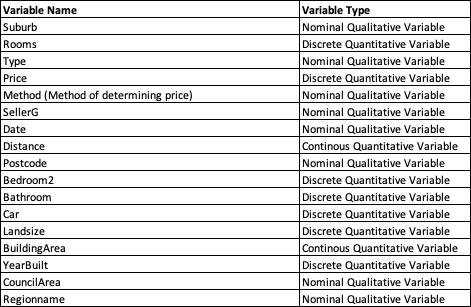

For the quantitative variables, we found important statistical measures such as the mean, median, standard deviation and so on. The results are shown below - 

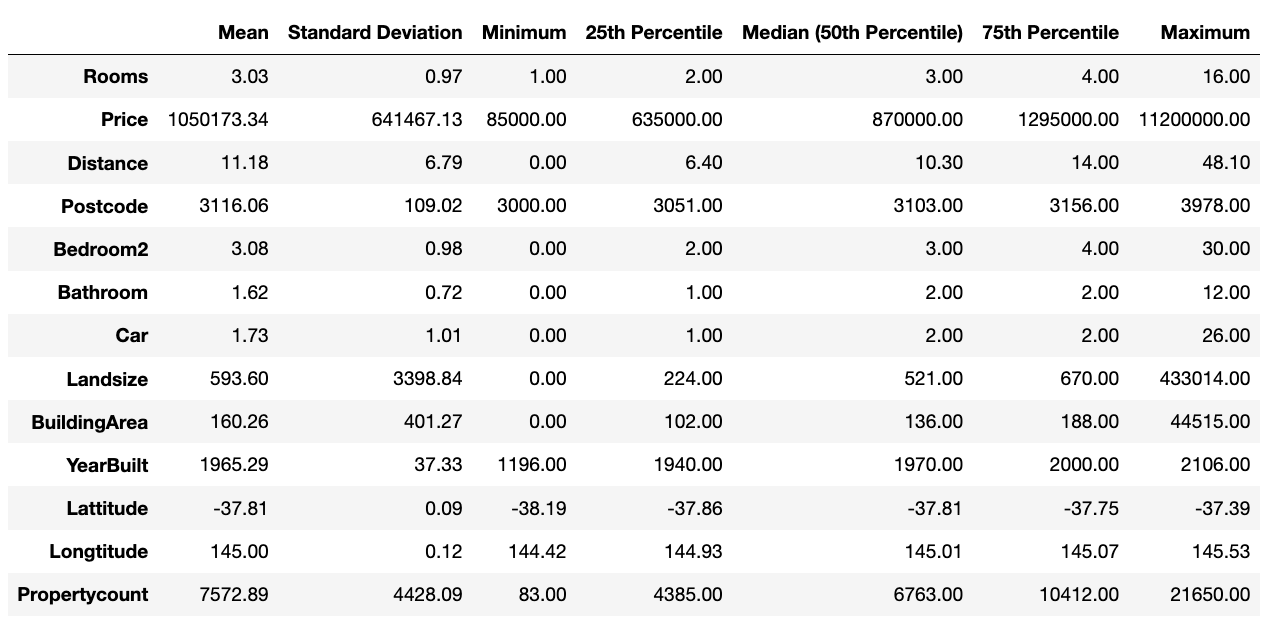

### Data Pre-Processing


Now, we move forward with Data Pre-processing to aid further analysis.


The next step is to find if there is any data that is missing in the dataset. Given below is the number of missing values in each variable. 

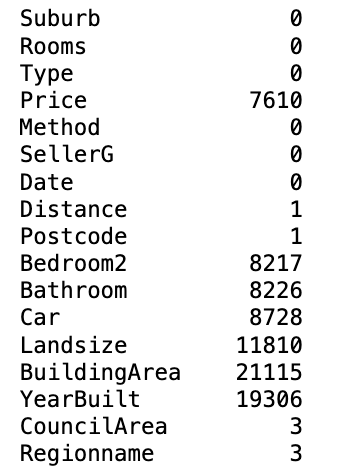

Further, the percentage of missing values is also shown.

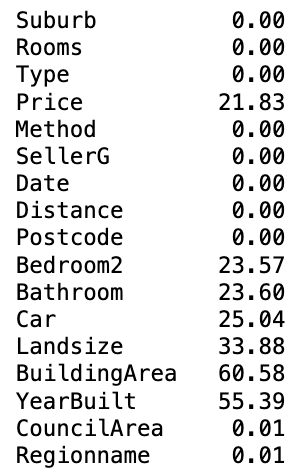

More than 50 % of data is missing for Building area and year built and 33% of data is missing for Landsize. Hence, these variables were dropped from the data. For the rest of the data, we deleted the rows with missing data. There were 6 duplicates in the data and those were removed as well.

Further, the fields Postcode, Suburb and CouncilArea provide the same type of information given by the RegionName. Hence, it was decided to have just the region name in the dataset and drop the rest of the fields.

The next step is to look for any outliers in the data that could negatively impact the training of the model. The outliers were identified by computing the Z_Score. Any data points with a Z_Score greater than 4 were deemed as Outliers and removed from the dataset. The number of rows removed are shown below for each feature. Outliers were only found for Quantitative variables.


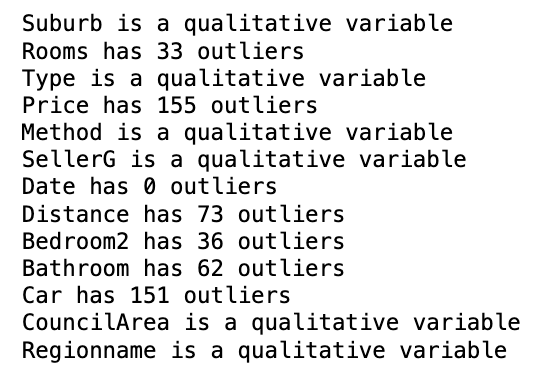


The number of rows remaining now equals 19,970. All these rows were used in training the model. However, before we train different models, we perform exploratory data analysis to understand trends within the data. This enables us to verify our hypotheses and see if our objectives can be reached.

### Exploratory Data Analysis

The first group of visualizations answer the following question - 
What is the distribution of the price of houses segregated by region?

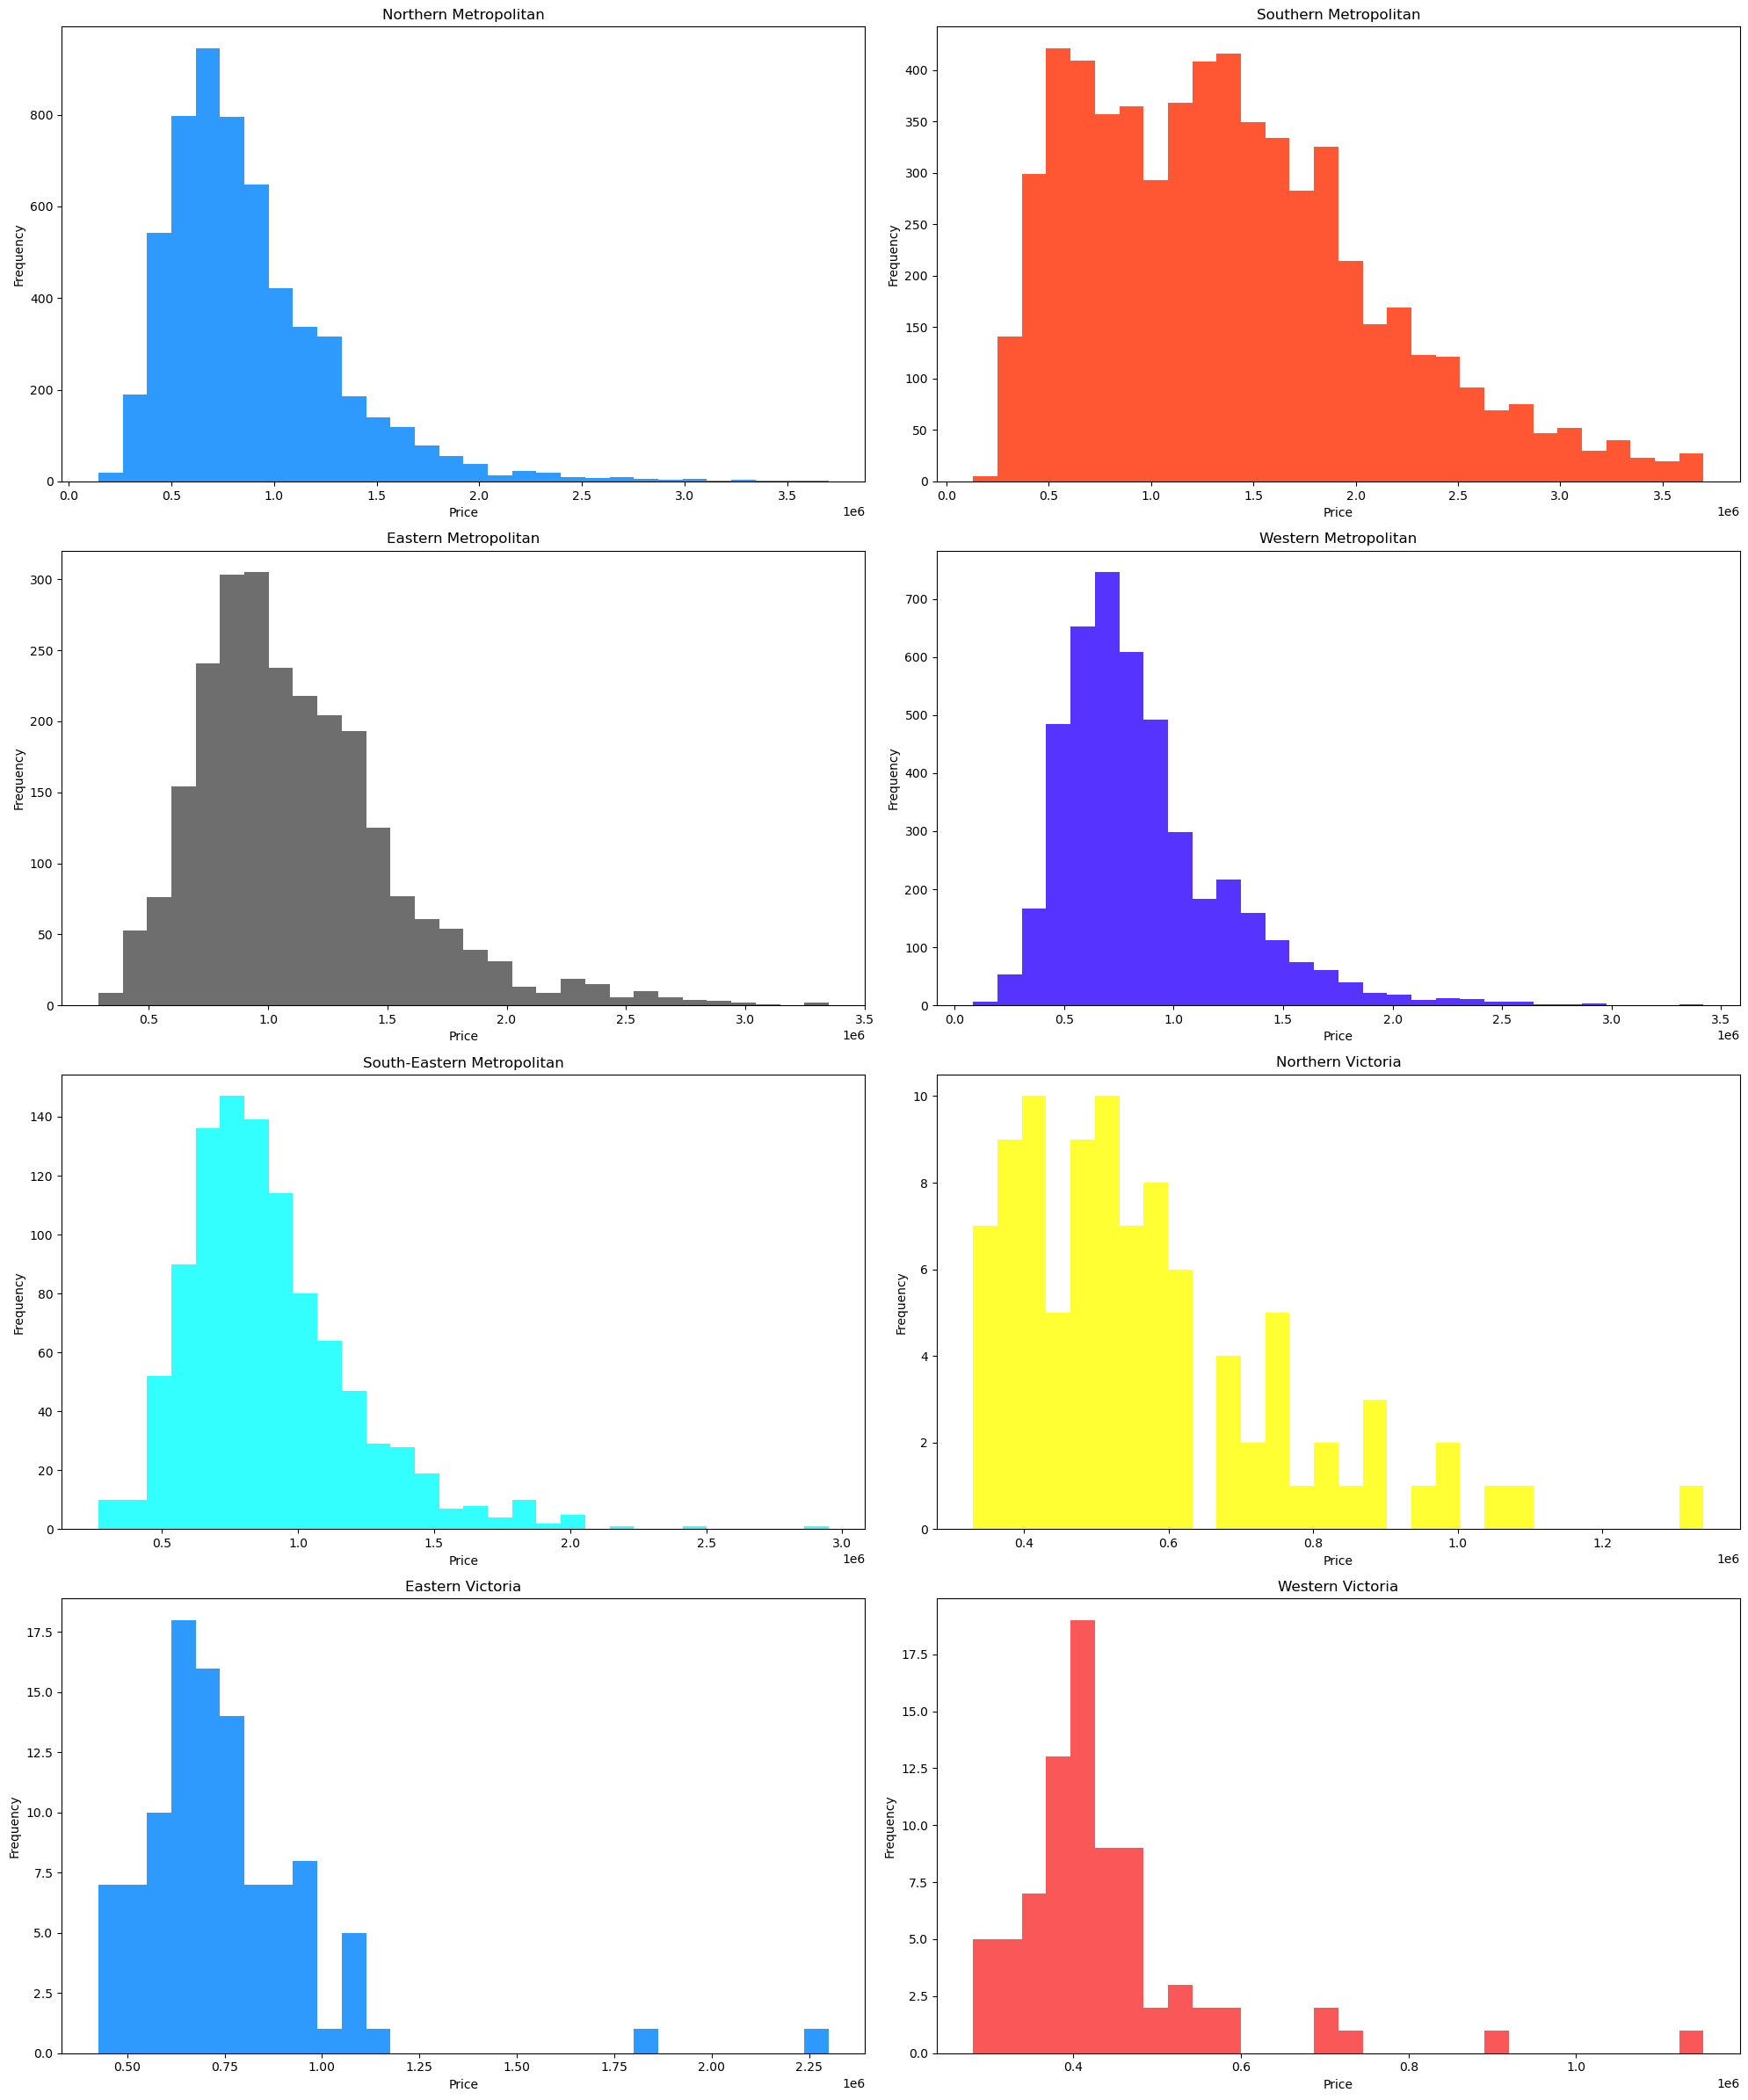

We can see the distribution of the prices in each region in the first set of plots. Later we compute the average price of each region and plot it on a line graph.

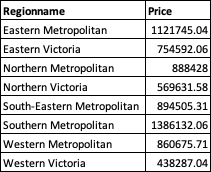

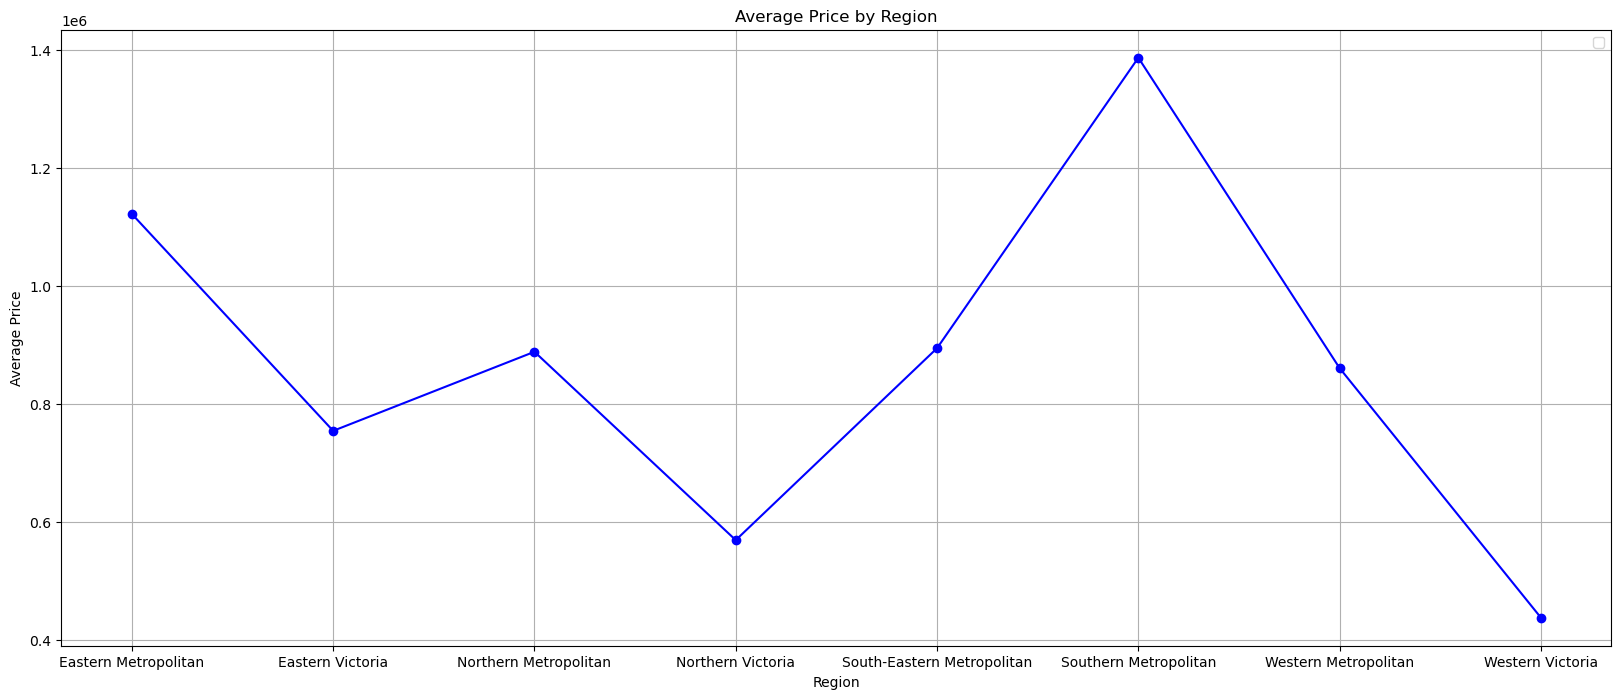

From the first set of visualizations, we can observe the variation in prices of houses in different regions. We can notice that the Northern Victoria region has most variation in price whereas the rest have very similar patterns with most of the prices at the lower end with a few expensive houses.

From the second visualization we can see that the southern metropolitan area has the highest prices and the Western Victoria area has lower prices. We can later compare this with the distance of each region to the CBD to understand any relationship to the prices between the distance from CBD office and region.

As mentioned above, this rises a question as to what might be the relation between the distance from the Melbourne CBD office and house prices. To observe this, a scatter plot between the two variables is plotted as shown below - 

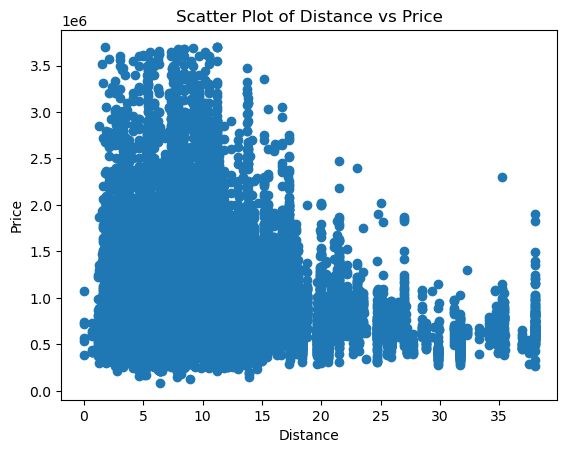

The scatter plot visualizes the relationship between the distance from the Melbourne CBD office and house prices. The vertical axis represents price, and the horizontal axis represents distance. It appears that as the distance from the center increases, there is a general trend of decreasing house prices, as indicated by the concentration of data points that have higher values closer to the center (left side of the plot) and lower values further away. However, there is considerable variation in prices at all distances, suggesting that factors other than distance also significantly influence house prices. There is also a notable spread in prices at similar distances, indicating a wide range of house prices in certain bands of distance from the center. In general, we can infer that distance usually has an inverse relation with the Price of a house given all other factors are kept constant.

## Methodology

Before we start training linear models on the dataset, a correlation plot is plotted to check if there are any fields that are highly correlated with each other and to check the correlation of different fields with the target variable - Price.

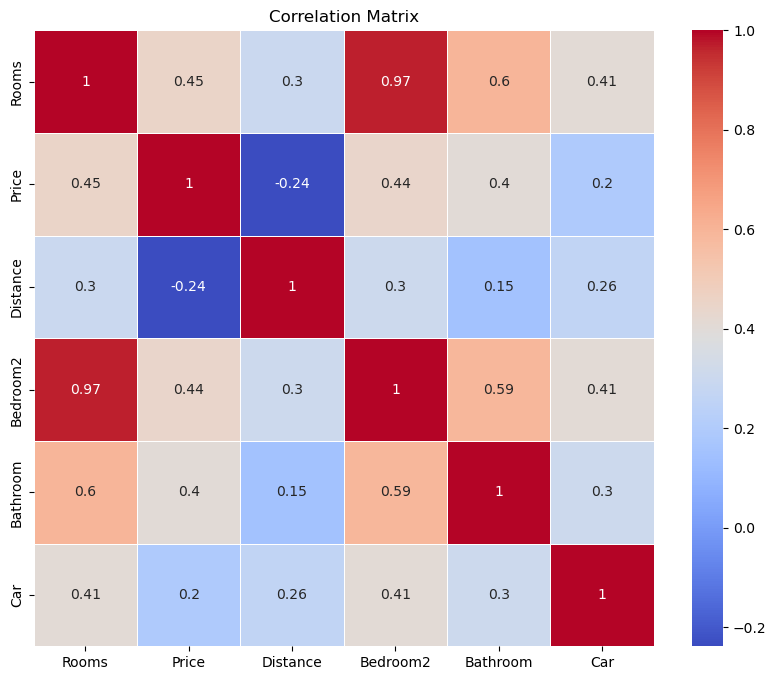


Most fields look to be fairly independent of each other and do not have any correlation. However, the number of bedrooms and Rooms are highly correlated and hence it would be redundant to include both in the feature matrix. We can safely remove one of them. The correlation values with Price seem to go in hand with the results found during EDA. Distance seems to have a negative impact on price.


Similar procedures can be performed for all other features but we will move forward and draw inferences from the coefficients of the linear model after it is trained instead.

For the next step, the standard scaler was used to normalize all quantitative data. Further, the categorical variables in the dataset was encoded and dummy variables added. The first field was dropped in each case while using the pandas function get_dummies. A snapshot of the transformed data ready to be trained is shown below - 

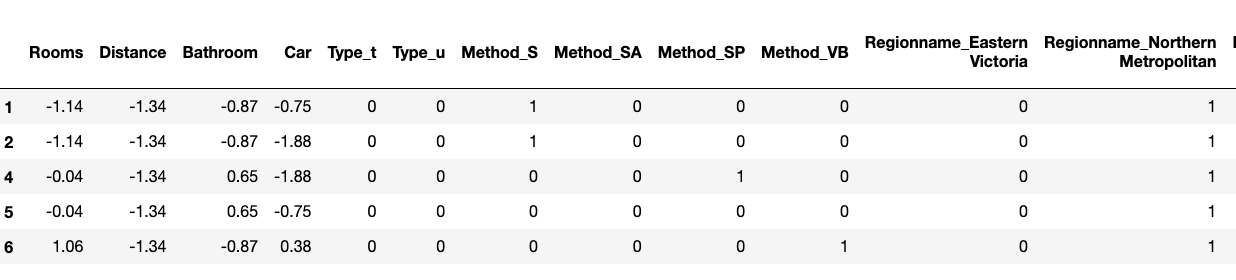

The next step is to divide the data based into training and testing sets. This was done using the train_test_split function and a split was made such that 30% of the data becomes test dataset and the rest used for training.

### Model Evaluation and Selection

The following models were trained and used on this dataset to enable making predictions - 

        - Multiple Linear Regression
        - Ridge Regression
        - Lasso Regression
        - Elastic Net Regression

#### Assumptions of each model - 

The regression models applied to this dataset have their own set of assumptions:

Multiple Linear Regression:

Linearity: The relationship between predictors (e.g., Rooms, Distance) and the target variable (price) is assumed to be linear.</br>
Independence: Observations are assumed to be independent of each other.</br>
Homoscedasticity: The variance of residuals (the differences between observed and predicted values) should be constant across all levels of the predictor variables.</br>
Normality: The residuals are assumed to be normally distributed.</br>


Ridge Regression:

Shares the same basic assumptions as multiple linear regression.</br>
It also assumes that reducing the magnitude of coefficients can reduce overfitting, which is handled by introducing a penalty term for large coefficients.

Ridge regression is suitable when there is multicollinearity in the data or when the number of predictor variables is close to or exceeds the number of observations.


Lasso Regression:

Has the same assumptions as linear regression.</br>
Assumes that a sparse representation of the model (with fewer parameters) might be beneficial, as it adds a penalty that can shrink some coefficients to zero, effectively performing feature selection.


Elastic Net Regression:

Combines assumptions from both Ridge and Lasso regression.</br>
Assumes that a mix of both penalty terms can provide a balance between feature selection and coefficient shrinkage, which can be more effective in certain scenarios.

### Implementation of Each Model 


#### Multiple Linear Regression 

The linear model is implemented using the LinearRegression class from the sklearn.linear_model module. The linear model is initialized without any explicit parameters, meaning it will use its default settings. Specifically, the fit method is called on the linear_model instance to train the model on the training dataset, which consists of feature data X_train and the corresponding target variable y_train. This training process involves finding the coefficients for the features that minimize the residual sum of squares between the observed targets in the dataset and the targets predicted by the linear approximation. Once the model is trained, it is ready to make predictions, which can be obtained by calling the predict method on the test dataset X_test. The trained model assumes that there is a linear relationship between the features and the target variable.


#### Ridge Regression

The RidgeCV class from the sklearn.linear_model module is used to implement Ridge regression with built-in cross-validation to find the optimal alpha parameter. A range of alpha values is defined using np.logspace, which generates 200 values. This comprehensive range allows for a thorough search across different orders of magnitude. The RidgeCV object is fitted to the training data, and cross-validation is performed to determine the best alpha value, which turns out to be approximately 2.409. This parameter is then used to train the Ridge model and predictions are made using this model.

#### Lasso Regression 

Lasso regression with cross-validation is implemented using the LassoCV class from the sklearn.linear_model module. The model is set up to evaluate a logarithmically spaced range of alpha values, created by np.logspace, which generates 200 values between 0.0001 and 10000. This allows for a granular search to identify the optimal level of regularization. The LassoCV is configured to perform 5-fold cross-validation (cv=5), which helps to ensure that the selected alpha generalizes well across different subsets of the data. After fitting the model to the training data, the best alpha value is determined through the cross-validation process, which is found to be approximately 38.720. This parameter is then used to train the Lasso model and predictions are made using this model.

#### Elastic Net Regression

An Elastic Net model, which combines L1 and L2 regularization, is fine-tuned using GridSearchCV from the sklearn.model_selection module. The grid of hyperparameters to be searched includes an array of alpha values from 0.01 to 1.00 with increments of 0.05, and an array of l1_ratio values from 0.01 to 1.00, also in steps of 0.05. The alpha parameter controls the overall strength of the regularization, while the l1_ratio determines the balance between L1 and L2 regularization. The GridSearchCV is set up with 10-fold cross-validation to ensure a robust search across the hyperparameter space. The model is fitted to the training data, and the best combination of parameters is determined based on the cross-validation score. The optimal hyperparameters are found to be an alpha of 0.01 and an l1_ratio of 0.96. These parameters are then used to train the Elastic Net model and predictions are made using this model.

### Model Comparison

The performance of multiple regression models has been evaluated using Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²) metrics. These metrics are crucial in determining how well each model predicts the target variable. Here's an interpretation of the results:


MSE is a measure of the average squared difference between the observed actual outturns and the predictions by the model. Lower values of MSE indicate better fit. All models show a very high MSE, suggesting either a large scale of the target variable or significant variance in the errors of the predictions.


RMSE is the square root of MSE and provides an estimate of the standard deviation of the prediction errors. RMSE values are in the same units as the target variable, making them more interpretable. All models have RMSE values around 346,423, which, depending on the scale of the target variable, might indicate large prediction errors.


R-squared (R²) measures the proportion of the variance in the dependent variable that is predictable from the independent variables, with a value between 0 and 1. Higher values indicate a better fit. The R² values for all models are around 0.625, which means approximately 62.5% of the variation in the dependent variable can be explained by the models. This indicates a moderate fit to the data.

The results are given below - 

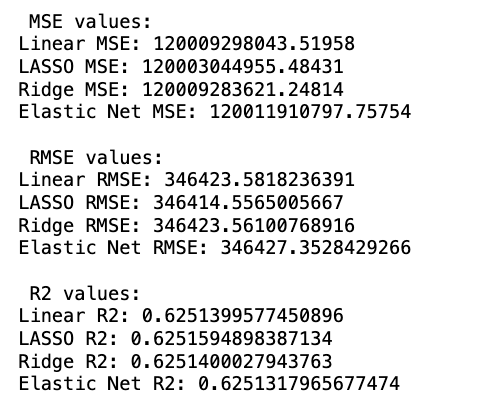


From these results, we can infer that all models are performing similarly in terms of MSE, RMSE, and R². The closeness of the performance metrics suggests that either the regularizations applied by Lasso, Ridge, and Elastic Net are not significantly improving the model over the basic Linear Regression, or the features present in the data do not have a strong linear relationship with the target variable. Additional model evaluation, perhaps with different sets of features or non-linear models, could provide further insights. It's also important to consider the context and the specific domain when assessing whether these metrics indicate a successful model.

However, out of the values that can be seen above, we can see that Lasso model has the least MSE and can be determined as the best model by a very slight margin. We will be using this model henceforth to arrive at our conclusion and provide results.

### Model Improvement

To improve the performance of the regression models, two key techniques were implemented: feature selection and regularization. Feature selection involves identifying the most relevant features that contribute to predicting the target variable, thus simplifying the model by removing unnecessary predictors that may cause noise and overfitting. 

Subsequently, regularization methods were applied to refine the models further. In penalized regression techniques such as Lasso, Ridge, and Elastic Net, hyperparameters are tuned to optimize model performance. Lasso (L1 regularization) is useful for feature selection as it can shrink less important feature coefficients to zero. Ridge (L2 regularization) penalizes the size of coefficients to prevent overfitting but does not set them to zero, which is useful when there are many small and meaningful effects. Elastic Net combines both penalties and is particularly beneficial when there are correlations between features.

Hyperparameter tuning was conducted for these models to find the optimal regularization strength (alpha) and the mix between L1 and L2 penalties (l1_ratio for Elastic Net). This was done using cross-validation methods like GridSearchCV or LassoCV/RidgeCV/ElasticNetCV, which search over a specified parameter grid to find the model that performs best as measured by a predefined score.

## Results and Interpretation


A plot of a histogram of the residuals and a scatter plot comparing the actual prices and predicted prices are given below - 

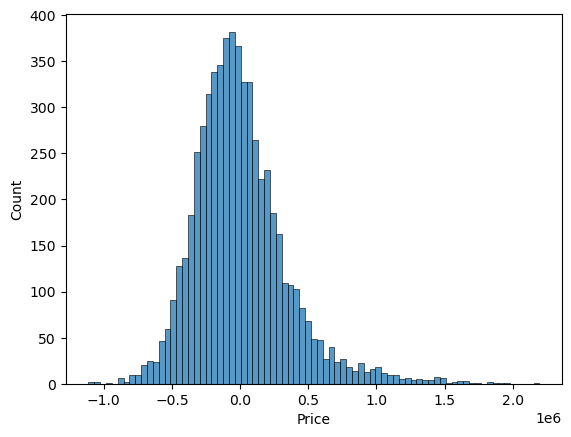

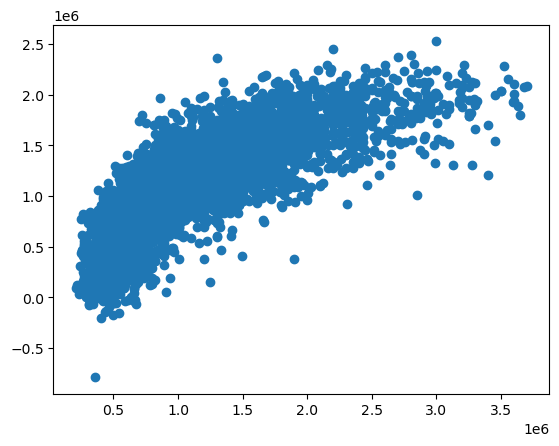


The results from the Lasso regression model's evaluation are visualized in two plots. The first is a histogram of the residuals, which are the differences between the actual values (y_test) and the predicted values (lasso_pred) from the model. The histogram displays a roughly normal distribution of residuals centered around zero. This suggests that, on average, the model’s predictions are close to the true values, indicating a good fit. However, there is a tail on the right side, indicating that there are several instances where the model underpredicts the actual price.

The second plot is a scatter plot comparing the actual prices to the predicted prices from the model. Ideally, the points should fall along a diagonal line, indicating perfect predictions. The scatter plot shows a concentration of points along a line, which indicates a positive correlation between the actual and predicted values — as the actual prices increase, so do the predictions. However, the spread of points becomes wider as the price increases, which could suggest that the model is less accurate at higher price ranges. This phenomenon is known as heteroscedasticity and suggests that the model’s performance is inconsistent across different values of the target variable.

Together, these plots reveal that while the Lasso model captures the general trend in the housing data, it has limitations, particularly in predicting higher-valued properties. Future work could involve exploring more complex models or incorporating additional features that might capture the variance more effectively at higher price ranges. Additionally, addressing any potential outliers or leveraging transformation techniques could improve the model's accuracy and consistency across the entire range of house prices.

The co-efficients of each variable using the Lasso model is given below - 

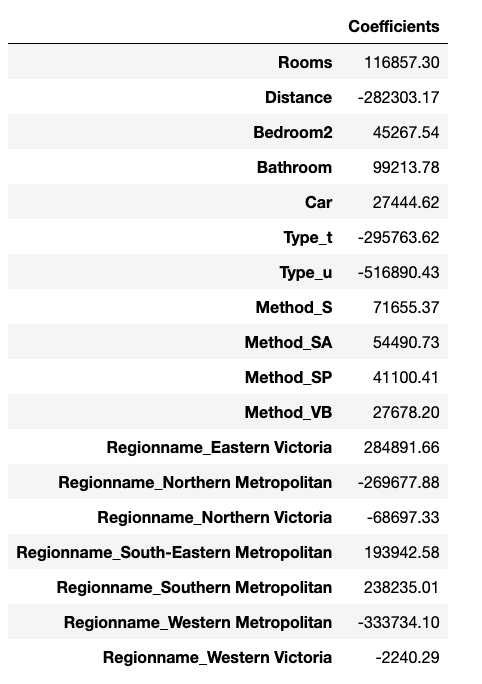


The coefficients reflect the expected change in the target variable (house price) for a one standard deviation change in the predictor variable, rather than the original units of the predictors. This is because the data was scaled as a pre-processing step before fitting the model.

#### Meaning of Coefficients:

Rooms: A one standard deviation increase in the number of rooms is associated with an average increase of approximately 116,857.30 units in the house price.</br>
Distance: A one standard deviation increase in distance is associated with an average decrease of approximately 282,303.17 units in the house price.</br>
The same logic applies to the other variables like Bedroom2, Bathroom, Car, and the categorical variables related to Type, Method, and Regionname.</br>

#### Interpretation:

Since the data is standardized, the magnitude of the coefficients can also be used to compare the relative importance of each feature in predicting the house price.</br>
A larger absolute value of a coefficient means that the corresponding feature has a more significant effect on the house price, per standard deviation change.</br>
For categorical variables, the interpretation is in comparison to the baseline category (which is not shown but implicitly has a coefficient of zero). The coefficients for these variables show the change in house price compared to the baseline, for a house that falls into that category.</br>

## Conclusion

### Main Discoveries and Implication

Discoveries from EDA - 

In conclusion, the analysis of the Melbourne housing dataset has revealed several insights into the factors affecting house prices. The scatter plot analysis indicated a general trend of decreasing house prices with increasing distance from the Melbourne CBD, highlighting the significance of location in real estate valuation. Despite this trend, the substantial variation at all distances suggests that other factors are at play, contributing to the diversity in house pricing.

The regional analysis provided further detail, with the Northern Victoria region displaying the most significant variation in prices, suggesting that factors unique to this region might influence the price beyond mere distance from the CBD. On the other hand, the Southern Metropolitan area was consistently associated with higher prices, while the Western Victoria area tended to have lower prices, which could be related to their respective distances from the CBD as well as other regional attributes like amenities, accessibility, and socioeconomic factors.

By integrating these findings with distance metrics, we can infer that while proximity to the CBD is a key determinant of price, regional characteristics and individual property features such as the number of rooms, bathrooms, and car spaces also play crucial roles. Therefore, stakeholders should consider a multifaceted approach when assessing property values, taking into account both the macro-location factors, like region and distance from the CBD, as well as micro-location considerations and property-specific attributes.

Discoveries from the Model Training - 

It is notable that the models tested—Multiple Linear Regression, Lasso, Ridge, and Elastic Net—exhibited similar performance in terms of MSE, RMSE, and R² metrics. This uniformity suggests that the regularization techniques employed may not offer a substantial improvement over standard linear regression for this dataset. Alternatively, it may indicate that the dataset's features do not entirely conform to the assumptions of linear relationships with the target variable. For future model refinement, exploring a broader set of features, incorporating non-linear models, and delving deeper into domain-specific contexts may yield more distinct and potentially enhanced predictive capabilities. This would allow for a more tailored approach, potentially uncovering complex patterns within the data that linear models may not capture.


Discoveries from Results of Model - 

In conclusion, the evaluation of the Lasso regression model through residual analysis and price prediction comparison highlights its ability and limitations in capturing the housing market's dynamics. The residual histogram suggests a good overall fit, with residuals normally distributed around zero, yet the presence of a right tail reveals the model's tendency to underpredict higher house prices. The scatter plot further supports this, showing that while the model predicts lower-priced houses relatively well, its accuracy diminishes for higher-priced houses, as evidenced by the increasing spread of predictions.

The analysis of the Lasso model's coefficients after standard scaling of the data offers valuable insights into the influence of various features on house prices. The sizeable coefficients for the number of rooms and distance from the CBD confirm their strong predictive power, albeit in opposite directions. The standardized coefficients allow for direct comparison of feature importance, revealing that type and location—categorical variables—are significantly influencing price predictions.

### Tying it back to the Hypotheses

    - To explore data and check for the relation between the price of the house and various features such as region, time of year of sale, type of house and so on.
    - To fit multiple linear models with the available features that are capable of predicting the value of a new house in the Melbourne real estate market.
    - Compare different linear models and ascertain the best model for making the prediction of house prices with respect to this dataset
    - Use the best linear model to then find the price of a hypothetical house
    
    
The discoveries from EDA gave us the answer to the first question. We were able to analyze the differences in prices at different regions. We were also able to understand the relation of different features with the price of a house in Melbourne. This was further reinforced with the co-efficients of the Lasso model. For example, the correlation matrix indicated a negative relation between the Distance and house price. The co-efficient for Distance for the lasso model is -282303.17 which means that for one standard deviation increase in the distance, the house price decreases by 282 thousand dollars.

We were able to fit multiple models and they were all able to predict house prices. However, the performance of each model seems to be similar to each other.

### Finding the Price of a Hypothetical House in Melbourne

The process for predicting the price of a hypothetical house in Melbourne using a Lasso regression model involves several steps. Initially, a dictionary of new house features is created, with specific values assigned to each feature, such as 'Rooms': 5, 'Distance': 15.2, and so on as given below. These values represent the characteristics of the house for which we want to predict the price.

Features of the hypothetical house:
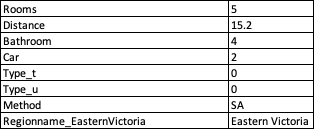


The next step in the process is standardization, which adjusts the new feature values to the same scale used when the Lasso model was trained. This is done by subtracting the mean and dividing by the standard deviation of each feature from the training dataset, ensuring that the new values are directly comparable to those the model has learned to interpret.

Once the features are standardized, they are assembled into a new data frame, formatted to match the structure expected by the Lasso model. The model's predict function is then used to estimate the price based on the standardized feature values.

The prediction process concludes with the model outputting a predicted price for the house, based on its learned coefficients and the standardized input features. In this case, the Lasso model predicts the house price to be approximately 2,080,456 units, reflecting the combined effect of the house's attributes as understood by the model.

This method can be used by anyone looking to enter the Melbourne housing market as a buyer or seller. It can help those looking to make a profit in the market.

### Limitations of Project

The project's limitations are centered around the observed low model accuracy and the exclusive use of linear models, which inherently do not capture non-linear relationships. Linear models assume a straight-line relationship between predictors and the outcome, which can be a significant constraint because real-world data often exhibit complex, non-linear patterns. This limitation is particularly pronounced in housing markets where factors such as location, neighborhood, and proximity to amenities can have a disproportionate impact on prices, not necessarily adhering to a linear trend.

The use of linear models may also oversimplify the interactions between variables. For instance, the effect of an additional bathroom on house price could vary depending on the number of bedrooms or the overall size of the house, a relationship that linear models may not adequately represent. Moreover, market sentiment and economic conditions, which are inherently dynamic and non-linear, can also influence housing prices.

The low model accuracy suggests that critical predictive factors or interactions are not being fully captured by the current models. This could be due to a lack of relevant features in the dataset, insufficient feature engineering, or the need for more sophisticated modeling techniques that can learn from complex patterns and interactions, such as ensemble methods, decision trees, or neural networks.

### Tackling Limitations

To address these limitations, future iterations of the project could explore the following:

Incorporating Non-Linear Models: To capture more complex relationships, non-linear models such as polynomial regression, support vector machines with non-linear kernels, decision trees, or neural networks might provide improved accuracy.

Feature Engineering: Creating new features that capture non-linear interactions between existing variables, or transforming features to better reflect the underlying distributions, could help linear models perform better.
Variable Transformation: Applying transformations such as log, square, or square root to certain variables may help in capturing non-linear effects and stabilize variance across the data.

Advanced Techniques: Techniques such as regularization, ensemble learning, or gradient boosting could be employed to manage overfitting and variance in the model predictions.

Domain Expertise: Consulting with real estate experts could provide insights that lead to the selection of more relevant features or the creation of more sophisticated composite variables.

## Reference and Appendix

Dataset Source: https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market

Code:

```

import pandas as pd
import seaborn as sns                       
import matplotlib.pyplot as plt  
import numpy as np
%matplotlib inline    
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv("Melbourne_housing_FULL.csv")

quantitative_summary = data.describe()
quantitative_summary = quantitative_summary.transpose()

quantitative_summary.rename(columns={
    'mean': 'Mean',
    'std': 'Standard Deviation',
    'min': 'Minimum',
    '25%': '25th Percentile',
    '50%': 'Median (50th Percentile)',
    '75%': '75th Percentile',
    'max': 'Maximum'
}, inplace=True)

quantitative_summary = quantitative_summary.iloc[:, 1:]
pd.options.display.float_format = '{:.2f}'.format

data_sub = data.drop(columns=["Address","Lattitude","Longtitude","Propertycount"])

data_sub.isna().sum()/len(data_sub)*100

### More than 50 % of data is missing for Building area and year built and 33% of data is missing for Landsize. Dropping these fields

data_clean1 = data_sub.drop(columns=["BuildingArea","YearBuilt","Landsize"])

data_clean = data_clean1.dropna()

data_clean = data_clean.drop_duplicates()

# Region name and postcode are mostly the same, removing postcode
data_clean = data_clean.drop(columns=["Postcode"])


#### Outliers

# check if quantitative variables have outliers.

def outliers_z(value):
    
    # Calculate the Z-scores
    z_score = (value - value.mean()) / value.std()
    
    # Define a threshold for outliers (e.g., Z-score > 3)
    threshold = 4
    
    # Identify and mark outliers
    outliers = abs(z_score) > threshold
    
    count_outliers = outliers.sum()
    return count_outliers
    
        
for col in data_clean.columns:
    dtype = data_clean.dtypes[col]
    
    if dtype == 'object':
        print(f"{col} is a qualitative variable")
    else:  # Check for quantitative columns
            
        outliers = outliers_z(data_clean[col])
        print(f"{col} has {outliers} outliers")

#### Remove Outliers

def remove_outliers_z(data, column):
    
    # Calculate the Z-scores
    z_score = (data[column] - data[column].mean()) / data[column].std()
    
    # Define a threshold for outliers (e.g., Z-score > 3 or < -3)
    threshold = 4
    
    # Identify and keep only the non-outliers
    non_outliers = abs(z_score) <= threshold
    
    # Return data without outliers
    return data[non_outliers]

# Apply the function to each quantitative column
for col in data_clean.columns:
    dtype = data_clean.dtypes[col]
    
    if dtype == 'object':
        print(f"{col} is a qualitative variable")
    else:
        # Remove outliers from this column
        data_clean = remove_outliers_z(data_clean, col)
        print(f"Outliers removed from {col}")


###### Correlation Plot

corr_data = data_clean
# Calculate the correlation matrix
corr_matrix = corr_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


##### EDA


Region_data = data_clean.iloc[:,[12,3]]
Regions = Region_data['Regionname'].unique()

northern_metropolitan = Region_data['Price'].loc[Region_data['Regionname'] == 'Northern Metropolitan'].values
southern_metropolitan = Region_data['Price'].loc[Region_data['Regionname'] == 'Southern Metropolitan'].values
eastern_metropolitan = Region_data['Price'].loc[Region_data['Regionname'] == 'Eastern Metropolitan'].values
western_metropolitan = Region_data['Price'].loc[Region_data['Regionname'] == 'Western Metropolitan'].values
southeastern_metropolitan = Region_data['Price'].loc[Region_data['Regionname'] == 'South-Eastern Metropolitan'].values
northern_victoria = Region_data['Price'].loc[Region_data['Regionname'] == 'Northern Victoria'].values
eastern_victoria = Region_data['Price'].loc[Region_data['Regionname'] == 'Eastern Victoria'].values
western_victoria = Region_data['Price'].loc[Region_data['Regionname'] == 'Western Victoria'].values

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 24))


data_region_plots = [
    northern_metropolitan,
    southern_metropolitan,
    eastern_metropolitan,
    western_metropolitan,
    southeastern_metropolitan,
    northern_victoria,
    eastern_victoria,
    western_victoria
]

regions_names = [
    'Northern Metropolitan',
    'Southern Metropolitan',
    'Eastern Metropolitan',
    'Western Metropolitan',
    'South-Eastern Metropolitan',
    'Northern Victoria',
    'Eastern Victoria',
    'Western Victoria'
]
colors = ['#2E9AFE', '#FF5733', '#6E6E6E', '#5733FF', '#33FFFF', '#FFFF33', '#2E9AFE', '#FA5858']
for i, ax in enumerate(axes.flatten()):
    if i < len(data_region_plots):
        ax.hist(data_region_plots[i], bins=30, color=colors[i])
        ax.set_title(regions_names[i])
        ax.set_xlabel('Price')
        ax.set_ylabel('Frequency')

plt.tight_layout()

# Show the plot
plt.show()





Region_mean = Region_data.groupby('Regionname')['Price'].mean().reset_index()
print(Region_mean)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 8))

plt.plot(Region_mean['Regionname'], Region_mean['Price'], color='blue', linestyle='-', marker='o')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price by Region')
plt.legend()
plt.grid(True)
plt.show()


plt.scatter(data_clean['Distance'], data_clean['Price'])
plt.title('Scatter Plot of Distance vs Price')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()



###### Pre-processing for Model Training

X = data_clean.iloc[:,[0,1,2] + list(range(4, 13))]
X = X.drop(columns=['Suburb','Date','SellerG','CouncilArea','Bedroom2'])
#X = X.drop(columns='Bedroom2')
Y = data_clean['Price']

columns_to_normalize = ['Rooms','Distance','Bathroom','Car']

scaler = MinMaxScaler()
scaler2 = StandardScaler()

X[columns_to_normalize] = scaler2.fit_transform(X[columns_to_normalize])

columns_to_encode = ['Type','Method','Regionname']

encoded_X = pd.get_dummies(X, columns=columns_to_encode,drop_first=True)



from sklearn.model_selection import train_test_split

# Splitting the dataset into train(70%) and test(30%) 
X_train, X_test, y_train, y_test = train_test_split(encoded_X,Y,test_size=0.3,
                                                    random_state=30)
                                                    



########### Model Training

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

### RidgeCV

from sklearn.linear_model import RidgeCV
from sklearn import metrics

# Defining list of alphas
alphas = np.logspace(-4, 4, 200)

# Create a ridge regressor object that does cross-validation
ridge_cv = RidgeCV(alphas=alphas)

# Fit it to our training data
ridge_cv.fit(X_train,y_train)

# Get predictions for test set.
y_pred_ridgecv=ridge_cv.predict(X_test)

print('Ridge CV Model Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred_ridgecv))
print('Best Alpha after Cross Validation :', ridge_cv.alpha_)


### LASSO CV

from sklearn.linear_model import LassoCV

# List of alphas to try
#alphas = [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9,1]
alphas = np.logspace(-4, 4, 200)

# Create a lasso regression model with built-in cross-validation mechanism
lasso_cv = LassoCV(alphas=alphas,cv=5)

# Fit the model using training data
lasso_cv.fit(X_train,y_train)

print(f"Best Alpha after Cross Validation {lasso_cv.alpha_}")

# Use trained model to make predictions on scaled test set.
predictions_cv = lasso_cv.predict(X_test)

# Calculate Mean Squared Error between actual and predicted values.
mse_cv = mean_squared_error(y_test,predictions_cv)

print(f"For best alpha={lasso_cv.alpha_}, Mean Squared Error after Cross Validation: {mse_cv}")

### Elastic Net Grid Search

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import make_regression

ElasticmodelTest = ElasticNet()
# Define the grid of hyperparameters 'param_grid'
param_grid = {
    'alpha': np.arange(0.01, 1.01, 0.05),  # Creates an array from 0.01 to 1.00 with a step of 0.05
    'l1_ratio': np.arange(0.01, 1.01, 0.05)  # Creates an array from 0.01 to 1.00 with a step of 0.05
}

grid_model_result = GridSearchCV(estimator=ElasticmodelTest,
                                 param_grid=param_grid,
                                 cv=10).fit(X_train,y_train)

print(f"Best: {grid_model_result.best_score_} using {grid_model_result.best_params_}")



######## Model Training

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score


# Initialize the models
linear_model = LinearRegression()
lasso_model = Lasso(alpha = 42.475715525369026)
ridge_model = Ridge(alpha= 2.409403560239527)
elasticnet_model = ElasticNet(alpha=0.01,l1_ratio=0.96)

# Fit the models on training data 
linear_model.fit(X_train,y_train)
lasso_model.fit(X_train,y_train)
ridge_model.fit(X_train,y_train)
elasticnet_model.fit(X_train,y_train)

# Make predictions on test data 
linear_pred = linear_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)
elasticnet_pred = elasticnet_model.predict(X_test)


######### Model Comparison

# Calculate mean squared error for each model's predictions 
print("\n MSE values:")
linear_mse = mean_squared_error(y_test, linear_pred)
linear_rmse = np.sqrt(linear_mse)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
elasticnet_mse=mean_squared_error(y_test, elasticnet_pred)
elasticnet_rmse = np.sqrt(elasticnet_mse)

print(f"Linear MSE: {linear_mse}")
print(f"LASSO MSE: {lasso_mse}")
print(f"Ridge MSE: {ridge_mse}")
print(f"Elastic Net MSE: {elasticnet_mse}")

print("\n RMSE values:")
print(f"Linear RMSE: {linear_rmse}")
print(f"LASSO RMSE: {lasso_rmse}")
print(f"Ridge RMSE: {ridge_rmse}")
print(f"Elastic Net RMSE: {elasticnet_rmse}")


# Calculate r square for each model's predictions 
linear_r2 = r2_score(y_test, linear_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
elasticnet_r2 = r2_score(y_test, elasticnet_pred)


print("\n R2 values:")
print(f"Linear R2: {linear_r2}")
print(f"LASSO R2: {lasso_r2}")
print(f"Ridge R2: {ridge_r2}")
print(f"Elastic Net R2: {elasticnet_r2}")


#### Results

import seaborn as sns
sns.histplot((y_test - lasso_pred))

plt.scatter(y_test, lasso_pred)


#### Coefficients

Coefficientdf = pd.DataFrame(data = lasso_model.coef_, index = X_train.columns, columns = ['Coefficients'])
Coefficientdf

##### Prediction for Hypothetical House

# Example prediction for new data
new_values = {
    'Rooms': 5,
    'Distance': 15.2,
    'Bathroom': 4,
    'Car':2,
    'Type_t': 0,
    'Type_u': 0,
    'Method_S': 0,
    'Method_SA': 1,
    'Method_SP': 0,
    'Method_VB': 0,
    'Regionname_Eastern Victoria': 1,
    'Regionname_Northern Metropolitan': 0,
    'Regionname_Northern Victoria': 0,
    'Regionname_South-Eastern Metropolitan': 0,
    'Regionname_Southern Metropolitan': 0,
    'Regionname_Western Metropolitan': 0,
    'Regionname_Western Victoria': 0
}

# Initialize an empty dictionary to store standardized new data
standardized_new_data = {}

columns_to_standardize_for_pred = ['Rooms','Distance','Bathroom','Car']

# Loop through each column in X_train to standardize the new data
for column in new_values:
    if column in columns_to_standardize_for_pred:    
        mean = data_clean[column].mean()
        std = data_clean[column].std()
        standardized_new_data[column] = [(new_values[column] - mean) / std]
    else:
        standardized_new_data[column] = new_values[column]
            

#print(new_values)
#print(standardized_new_data)
# Convert the standardized data into a DataFrame
new_data = pd.DataFrame(standardized_new_data)
#new_data

# Predict the happiness score for the new data
predicted_house_price = lasso_model.predict(new_data)

print(predicted_house_price)


```